<a href="https://colab.research.google.com/github/Jalalbaim/EcoG-signal-Prediction/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Regression
**Practical Introduction to Machine Learning - MAP654I**

@author: MJ.BAIM


In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sk

## 2. Data visualization and pre-processing

In [4]:
# Load ECoG data
ecg_path = "/content/ECoG.npz"
ecg_data = np.load(ecg_path)
ecg_data_lst = ecg_data.files
for item in ecg_data_lst:
    print(item)

Yall
Fe
Xall


(3327, 64)
(3327, 1)


/tmp/ipython-input-2070041534.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Fe = float(ecg_data['Fe'])


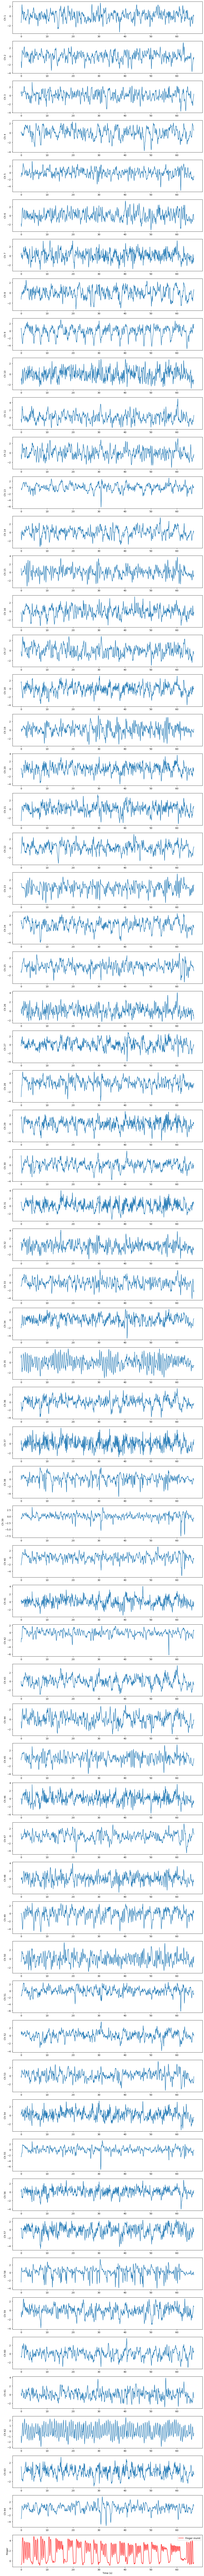

In [5]:
# Visualize data
Xall = ecg_data['Xall']
Yall = ecg_data['Yall']
Fe = float(ecg_data['Fe'])
print(Xall.shape)
print(Yall.shape)

t = np.arange(Xall.shape[0]) / Fe

plt.figure(figsize=(12, 150))
for i in range(64):
    plt.subplot(65, 1, i + 1)
    plt.plot(t, Xall[:, i])
    plt.ylabel(f'Ch {i+1}')
plt.subplot(65, 1, 65)
plt.plot(t, Yall[:, 0], color='r', label='Finger mvmt')
plt.ylabel('Finger')
plt.xlabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()

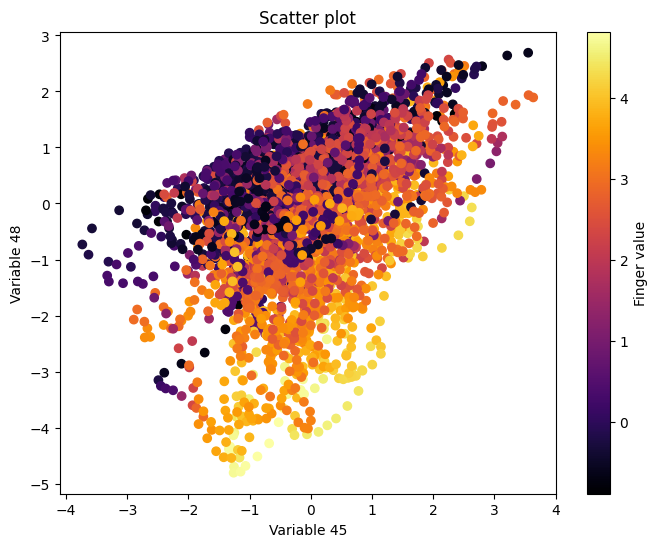

In [6]:
#  visualize scatter plot of variables 45 and 48
plt.figure(figsize=(8, 6))
sc = plt.scatter(Xall[:, 45], Xall[:, 48], c=Yall[:, 0], cmap='inferno')
plt.colorbar(sc, label='Finger value')
plt.xlabel('Variable 45')
plt.ylabel('Variable 48')
plt.title('Scatter plot')
plt.show()

**Observation:**
- There is a positive correlation: as one variable increases, the other also increases.
- The color changes smoothly, which means both variables are related to the finger value.
- These variables are good candidates for predicting the finger value.

In [7]:
# Splitting Data
n = 1000
X_train = Xall[:n, :]
Y_train = Yall[:n, :]
X_test = Xall[n:, :]
Y_test = Yall[n:, :]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1000, 64)
(1000, 1)
(2327, 64)
(2327, 1)


## Least Squares Regression

In [8]:
# preparing data for LS
Xtrain_hat = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
print(Xtrain_hat.shape)

(1000, 65)


For the Least Squares method, the parameter estimation is given by the following equation:

$$\hat{W} = (X^T X)^{-1} X^T y$$


In [9]:
# Parameter estimation using Least Squares
w = np.linalg.solve(Xtrain_hat.T @ Xtrain_hat, Xtrain_hat.T @ Y_train)
b=w[-1, 0]
print("w shape:", w.shape)
print("b:", b)

w shape: (65, 1)
b: 1.9008125499844777


To make predictions, we have to compute :
$$\hat{y} = X \hat{W}$$

In [10]:
# predictions
Ytrain_pred = Xtrain_hat @ w
Ytest_pred = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1) @ w
print(Ytrain_pred.shape)
print(Ytest_pred.shape)

(1000, 1)
(2327, 1)


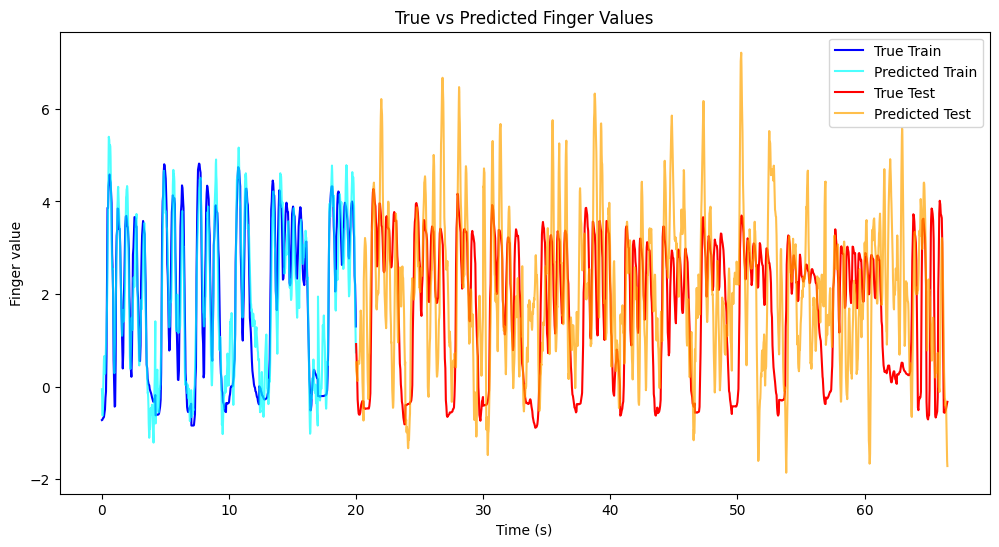

In [11]:
# y plots
plt.figure(figsize=(12, 6))
plt.plot(t[:n], Y_train, label='True Train', color='blue')
plt.plot(t[:n], Ytrain_pred, label='Predicted Train', color='cyan', alpha=0.7)
plt.plot(t[n:], Y_test, label='True Test', color='red')
plt.plot(t[n:], Ytest_pred, label='Predicted Test', color='orange', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Finger value')
plt.title('True vs Predicted Finger Values')
plt.legend()
plt.show()

**Observations**

- The first part of the plot (in blue) corresponds to the training set, where the predicted flexion closely matches the true flexion values.

- In contrast, the second part (in orange) represents the test set, where the predictions are poor, indicating that the model does not generalize well to unseen data.

In [12]:
# MSE and R²
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(Y_train, Ytrain_pred)
mse_test = mean_squared_error(Y_test, Ytest_pred)
r2_train = r2_score(Y_train, Ytrain_pred)
r2_test = r2_score(Y_test, Ytest_pred)

print(f'Training MSE: {mse_train:.4f}, R²: {r2_train:.4f}')

print(f'Testing MSE: {mse_test:.4f}, R²: {r2_test:.4f}')


Training MSE: 0.5041, R²: 0.8395
Testing MSE: 3.0455, R²: -0.4282


By examining the MSE and R² values, it’s clear that the model is overfitting the training data which is consistent with what we observed in the plot.

The R² score is high for the training set (0.84) but drops for the test set (-0.42) which means that the model performs worse than just predicting the mean of 𝑦 for every sample.

Similarly, the MSE is much lower on the training set (0.50) than on the test set (3.04), confirming that the model performs well on seen data but fails to generalize.

In [13]:
# Using sklearn LinearRegression

from sklearn.linear_model import LinearRegression

lse = LinearRegression().fit(X_train, Y_train)
print("Coefficients:", lse.coef_)
print("Intercept:", lse.intercept_)

Coefficients: [[-0.09150694  0.10861623 -0.07305774 -0.27938349  0.25112061  0.41213833
   0.14387528 -0.19811799  0.40869961  0.7059866  -0.4557358   0.02140866
   0.35947183 -0.01042572 -0.17655887 -0.03377368 -0.11345198 -0.72143135
  -0.5950915   0.23329595 -0.65132811 -0.33317441  0.28861537  0.24498034
   0.22062027  0.19042788  0.20709995  0.3273775  -0.65410592  0.11997444
  -0.07491945  0.10667581  0.11003235 -0.42910159 -0.22329342 -0.00381723
  -0.06046664 -0.1595164  -0.48519392  0.15019433  0.25855769 -0.09242374
   0.76314124 -0.0834797   0.04489988 -0.16816255  0.04845934  0.0256902
  -1.03905805  0.16060454 -0.19110549  0.16557271  0.08064689  0.27554638
  -0.01162067 -0.00740264  0.33850545  0.22409642 -0.2196636  -0.26866884
  -0.16469195 -0.23638421  0.04244268  0.5694358 ]]
Intercept: [1.90081255]


By comparing the estimated features using sklearn, and by solving the equation, we find out that they are very close (~equal).

## Ridge Regression

In [14]:
from sklearn.linear_model import Ridge

rg = Ridge(alpha = 1).fit(X_train, Y_train)

print("Coefficients:", rg.coef_)
print("Intercept:", rg.intercept_)

Coefficients: [-0.09281128  0.10168108 -0.07118674 -0.28125733  0.24829664  0.41170689
  0.14784073 -0.20078202  0.40397115  0.68996375 -0.45187482  0.02342179
  0.35756723 -0.00810832 -0.16424512 -0.02817215 -0.1128293  -0.70851436
 -0.57983649  0.21642716 -0.63870513 -0.33395478  0.28346436  0.2444705
  0.21785944  0.19086332  0.20351714  0.32634007 -0.64741761  0.11638564
 -0.06731498  0.09991519  0.11232018 -0.4143852  -0.21285209 -0.00258811
 -0.06035078 -0.1660517  -0.47516661  0.14227146  0.24726367 -0.09277831
  0.74710064 -0.08232516  0.04715387 -0.15701992  0.04453086  0.02504146
 -1.02649644  0.15506989 -0.18992473  0.16471429  0.08436513  0.27074524
 -0.01549748 -0.00281316  0.33051352  0.22324006 -0.21991422 -0.2642047
 -0.15887187 -0.22784332  0.03725006  0.56300781]
Intercept: [1.89944129]


In [15]:
# ridge predictions
Ytrain_pred_ridge = rg.predict(X_train)
Ytest_pred_ridge = rg.predict(X_test)

# perf
mse_train_ridge = mean_squared_error(Y_train, Ytrain_pred_ridge)
mse_test_ridge = mean_squared_error(Y_test, Ytest_pred_ridge)
r2_train_ridge = r2_score(Y_train, Ytrain_pred_ridge)
r2_test_ridge = r2_score(Y_test, Ytest_pred_ridge)

print(f'Ridge Training MSE: {mse_train_ridge:.4f}, R²: {r2_train_ridge:.4f}')
print(f'Ridge Testing MSE: {mse_test_ridge:.4f}, R²: {r2_test_ridge:.4f}')

Ridge Training MSE: 0.5042, R²: 0.8395
Ridge Testing MSE: 3.0038, R²: -0.4086


For $\lambda = 1$ we obtain a the same results as LS, the model overfitts and unable to generalize.

Minimum Test MSE: 1.6239059826952074
Index of Minimum Test MSE: 74
Best lambda is: 954.5484566618347


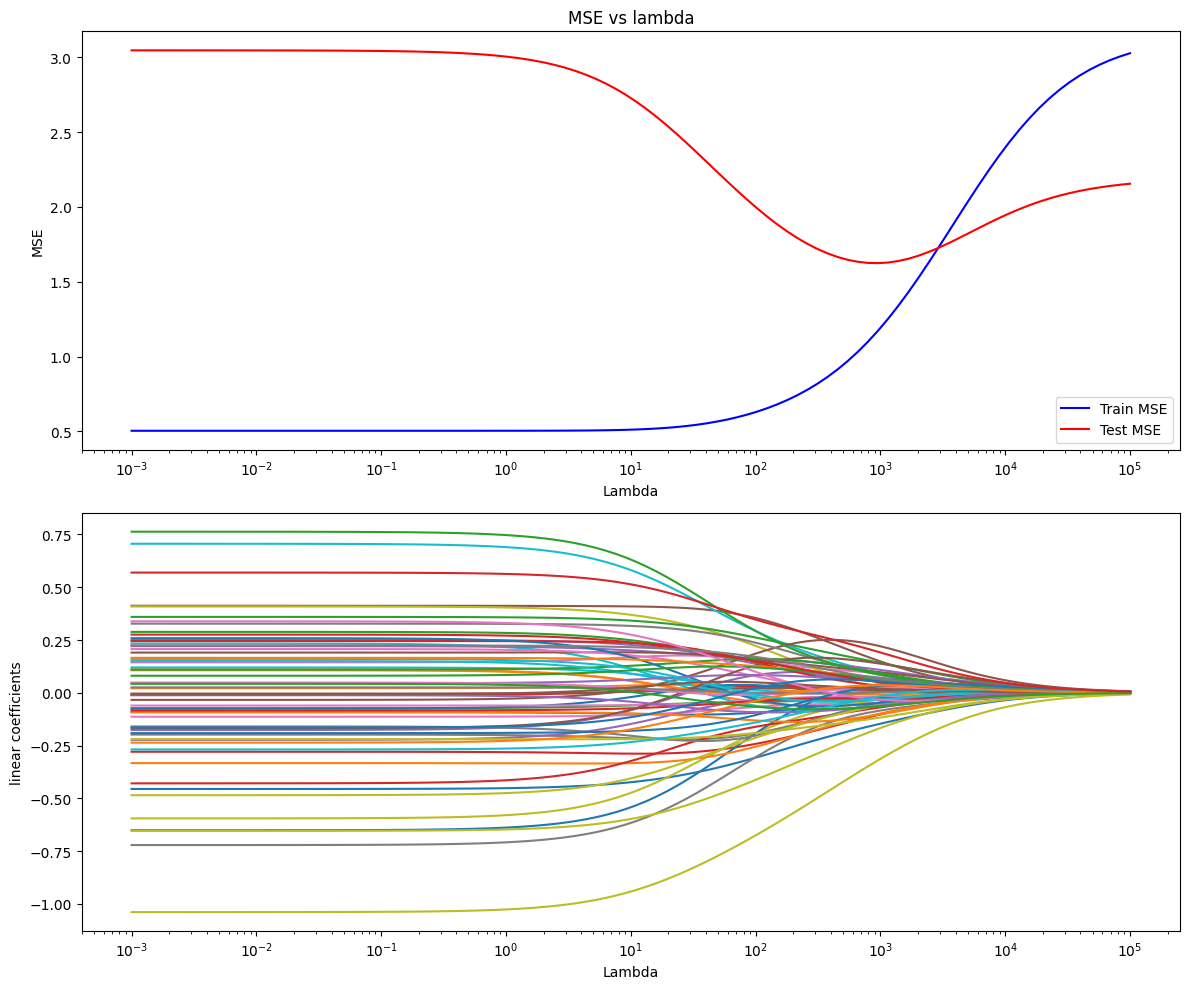

In [16]:
# Ridge regression for different lambdas + Best lambda selection

lambdas = np.logspace(-3, 5, 100)
mse_tests = []
mse_trains = []
coefs = []
beta = []

for lam in lambdas:
    rg = Ridge(alpha=lam).fit(X_train, Y_train)
    Ytrain_pred_ridge = rg.predict(X_train)
    Ytest_pred_ridge = rg.predict(X_test)
    mse_trains.append(mean_squared_error(Y_train, Ytrain_pred_ridge))
    mse_tests.append(mean_squared_error(Y_test, Ytest_pred_ridge))
    coefs.append(rg.coef_)
    beta.append(rg.intercept_)

min_test = min(mse_tests)
min_idx = mse_tests.index(min_test)
print("Minimum Test MSE:", min_test)
print("Index of Minimum Test MSE:", min_idx)
print(f'Best lambda is: {lambdas[min_idx]}')

# Plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(lambdas, mse_trains, label='Train MSE', color='blue')
plt.plot(lambdas, mse_tests, label='Test MSE', color='red')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE vs lambda')
plt.legend()

plt.subplot(2, 1, 2)
coef_array = np.array(coefs)
if coef_array.ndim == 1:
    plt.plot(lambdas, coef_array, label='Intercept')
else:
    for i in range(coef_array.shape[1]):
        plt.plot(lambdas, coef_array[:, i])
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('linear coefficients')
plt.tight_layout()
plt.show()


**Observations**

From the figures above, we observe that as the MSE on the test set decreases, the MSE on the training set slightly increases, while the parameter values become smaller.

This trend is encouraging because it indicates a reduction in overfitting, instead of performing exceptionally well only on the training data, the model achieves balanced performance on both train and test sets.

Moreover, Ridge regression smooths the parameter values by shrinking larger coefficients and slightly increasing smaller ones.

The optimal lambda is therefore the one that yields the lowest MSE on the test set.

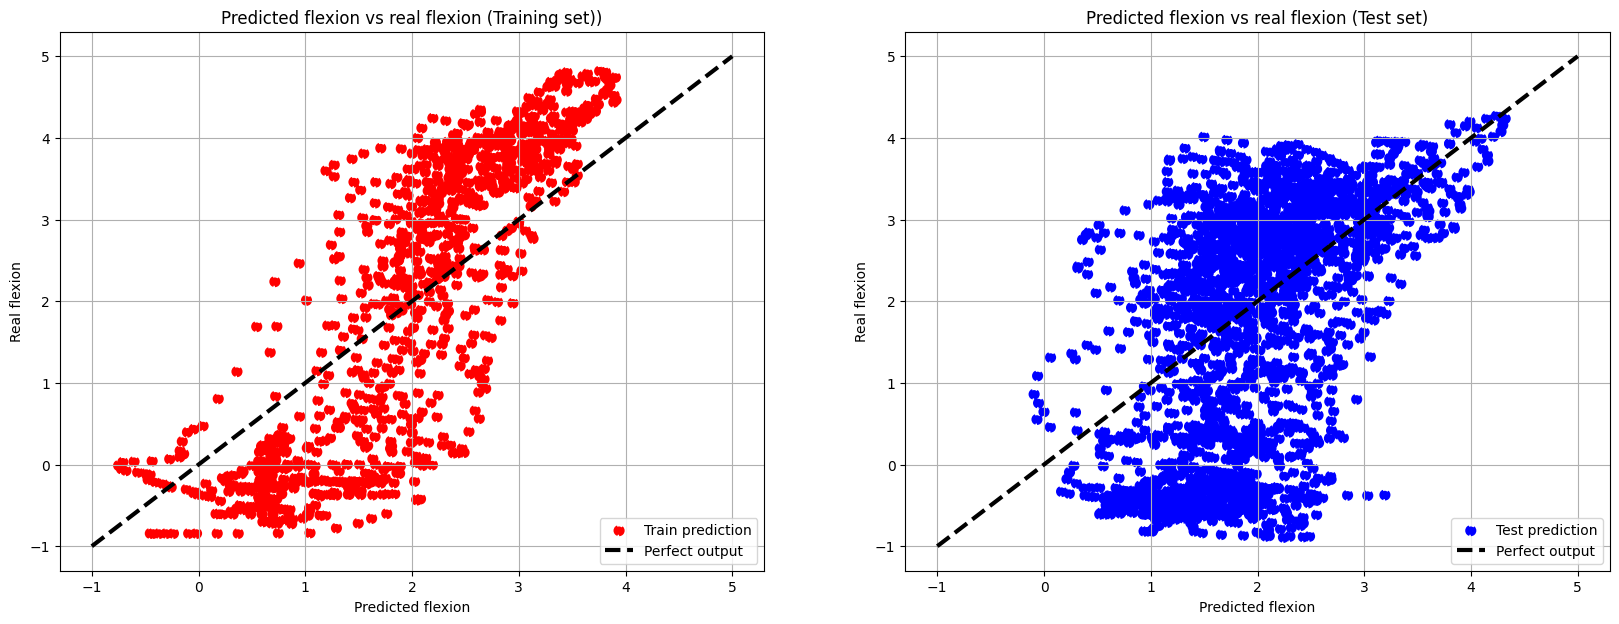

In [17]:
best_lambda = lambdas[min_idx]
rdg = Ridge(alpha=best_lambda)
rdg.fit(X_train, Y_train)
virtual_val = [i for i in range(-1, 6)]
y_pred_train = rdg.predict(X_train)
y_pred_test = rdg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].scatter(y_pred_train, Y_train, color='red', linewidth=2, linestyle='--')
axes[0].plot(virtual_val, virtual_val, color='black', linewidth=3, linestyle='--')
axes[0].set_xlabel("Predicted flexion")
axes[0].set_ylabel("Real flexion")
axes[0].set_title("Predicted flexion vs real flexion (Training set))")
axes[0].legend(["Train prediction", "Perfect output"], loc='lower right')
axes[0].grid()

axes[1].scatter(y_pred_test, Y_test, color='blue', linewidth=2, linestyle='--')
axes[1].plot(virtual_val, virtual_val, color='black', linewidth=3, linestyle='--')
axes[1].set_xlabel("Predicted flexion")
axes[1].set_ylabel("Real flexion")
axes[1].set_title("Predicted flexion vs real flexion (Test set)")
axes[1].legend(["Test prediction", "Perfect output"], loc='lower right')
axes[1].grid()

From the graphs above, we can see that overfitting has been significantly reduced. The predictions on the test set are much more accurate, although the overall performance could still be improved, as shown by the high variance around the ideal output line (in black).

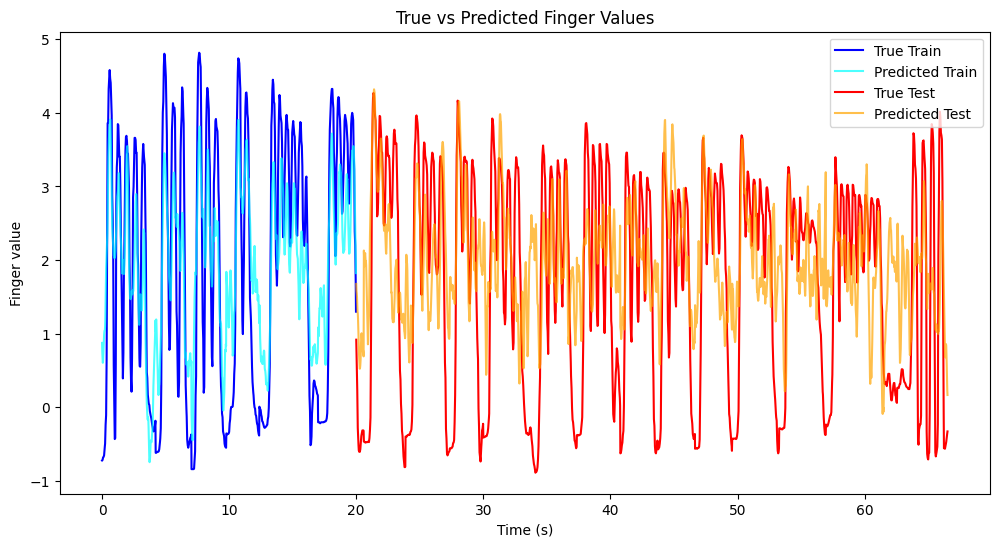

In [18]:
# Predictions with best lambda

best_rg = Ridge(alpha = best_lambda).fit(X_train, Y_train)
ytrain_pred = best_rg.predict(X_train)
ytest_pred = best_rg.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(t[:n], Y_train, label='True Train', color='blue')
plt.plot(t[:n], ytrain_pred, label='Predicted Train', color='cyan', alpha=0.7)
plt.plot(t[n:], Y_test, label='True Test', color='red')
plt.plot(t[n:], ytest_pred, label='Predicted Test', color='orange', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Finger value')
plt.title('True vs Predicted Finger Values')
plt.legend()
plt.show()

The first part of the graph shows that the model performs very well on the training set.

However, while the predictions on the test data are better than those obtained with the least squares method, they are still not fully satisfactory. In particular, the amplitudes of the predicted curve only roughly align with the true values.

In [19]:
# best perf
mse_train_ridge_best = mean_squared_error(Y_train, ytrain_pred)
mse_test_ridge_best = mean_squared_error(Y_test, ytest_pred)
r2_train_ridge_best = r2_score(Y_train, ytrain_pred)
r2_test_ridge_best = r2_score(Y_test, ytest_pred)

print(f'Ridge Training MSE: {mse_train_ridge_best:.4f}, R²: {r2_train_ridge_best:.4f}')
print(f'Ridge Testing MSE: {mse_test_ridge_best:.4f}, R²: {r2_test_ridge_best:.4f}')

Ridge Training MSE: 1.1719, R²: 0.6268
Ridge Testing MSE: 1.6239, R²: 0.2385


**Conclusion**

When comparing the MSE and scores of Ridge and Least Squares regression, we clearly see what we expected: overfitting has been greatly reduced, even though the training performance is lower.

The model with Ridge is better than the LS one.

(1, 64)
(64,)


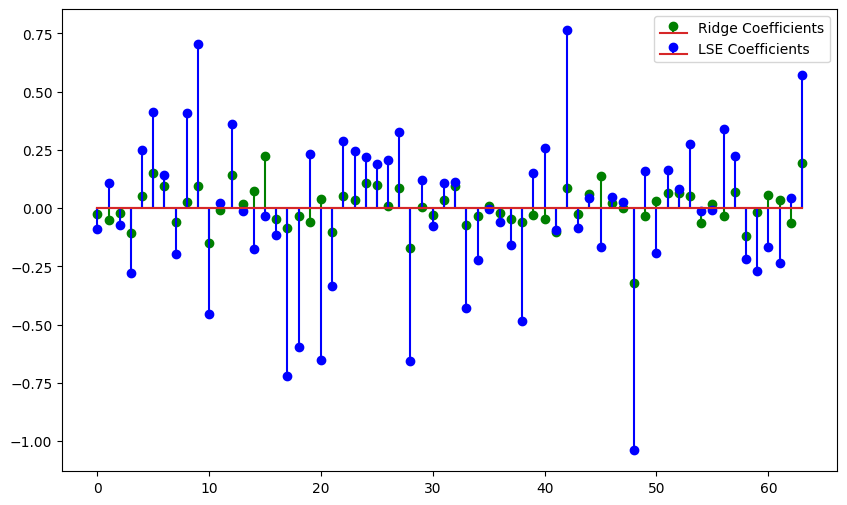

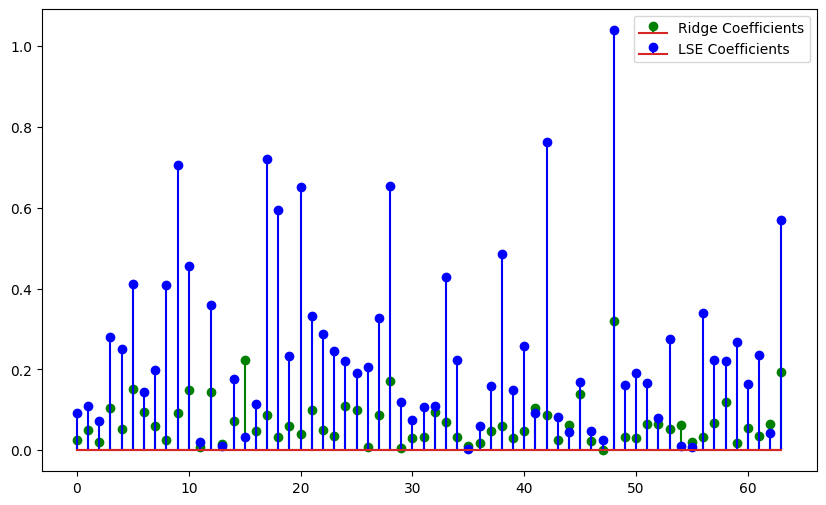

In [20]:
# Coefficients comparison

w_lse = lse.coef_
b_lse = lse.intercept_
w_ridge = best_rg.coef_
b_ridge = best_rg.intercept_

print(w_lse.shape)
print(w_ridge.shape)

plt.figure(figsize=(10, 6))
plt.stem(w_ridge, linefmt='g-', markerfmt='go', label='Ridge Coefficients')
plt.stem(w_lse.squeeze(), linefmt='b-', markerfmt='bo', label='LSE Coefficients')
plt.legend()
plt.show()

# absolute values
plt.figure(figsize=(10, 6))
plt.stem(np.abs(w_ridge), linefmt='g-', markerfmt='go', label='Ridge Coefficients')
plt.stem(np.abs(w_lse.squeeze()), linefmt='b-', markerfmt='bo', label='LSE Coefficients')
plt.legend()
plt.show()


**Observations**

In this plot, the impact of L2 regularization is clearly visible.

The Ridge coefficients have smaller magnitudes than those from the least squares method, and their values are more evenly distributed.

This smoothing effect helps prevent overfitting and makes the model more stable, which explains why Ridge regression performs better on the test set.

## Variable selection with lasso

In [21]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(X_train, Y_train)
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Coefficients: [ 0.  0.  0. -0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0.  0. -0. -0.
  0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0. -0. -0.
 -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.
  0.  0. -0.  0. -0.  0.  0.  0. -0.  0.]
Intercept: [1.9443274]


All the model’s parameters have been reduced to zero. Since Lasso regularization encourages sparsity, this indicates that the regularization strength is too high and needs to be decreased.

In [22]:
# predictions

Ytrain_pred_lasso = lasso.predict(X_train)
Ytest_pred_lasso = lasso.predict(X_test)

# performance

mse_train_lasso = mean_squared_error(Y_train, Ytrain_pred_lasso)
mse_test_lasso = mean_squared_error(Y_test, Ytest_pred_lasso)
r2_train_lasso = r2_score(Y_train, Ytrain_pred_lasso)
r2_test_lasso = r2_score(Y_test, Ytest_pred_lasso)

print(f'Lasso Training MSE: {mse_train_lasso:.4f}, R²: {r2_train_lasso:.4f}')
print(f'Lasso Testing MSE: {mse_test_lasso:.4f}, R²: {r2_test_lasso:.4f}')

Lasso Training MSE: 3.1406, R²: 0.0000
Lasso Testing MSE: 2.1907, R²: -0.0273


We notice that R² = 0, This means that the model is not explaining any of the variance in the target variable — it performs no better than simply predicting the mean of the data.

In this case, the reason is clear:
- All coefficients are zero, because the Lasso regularization strength (α = 1) is too high.
- With all parameters set to zero, the model output is just the intercept, i.e., a constant prediction equal to the average of the training targets.

1.3659542352560023
26
best lambda is: 0.1261856883066021


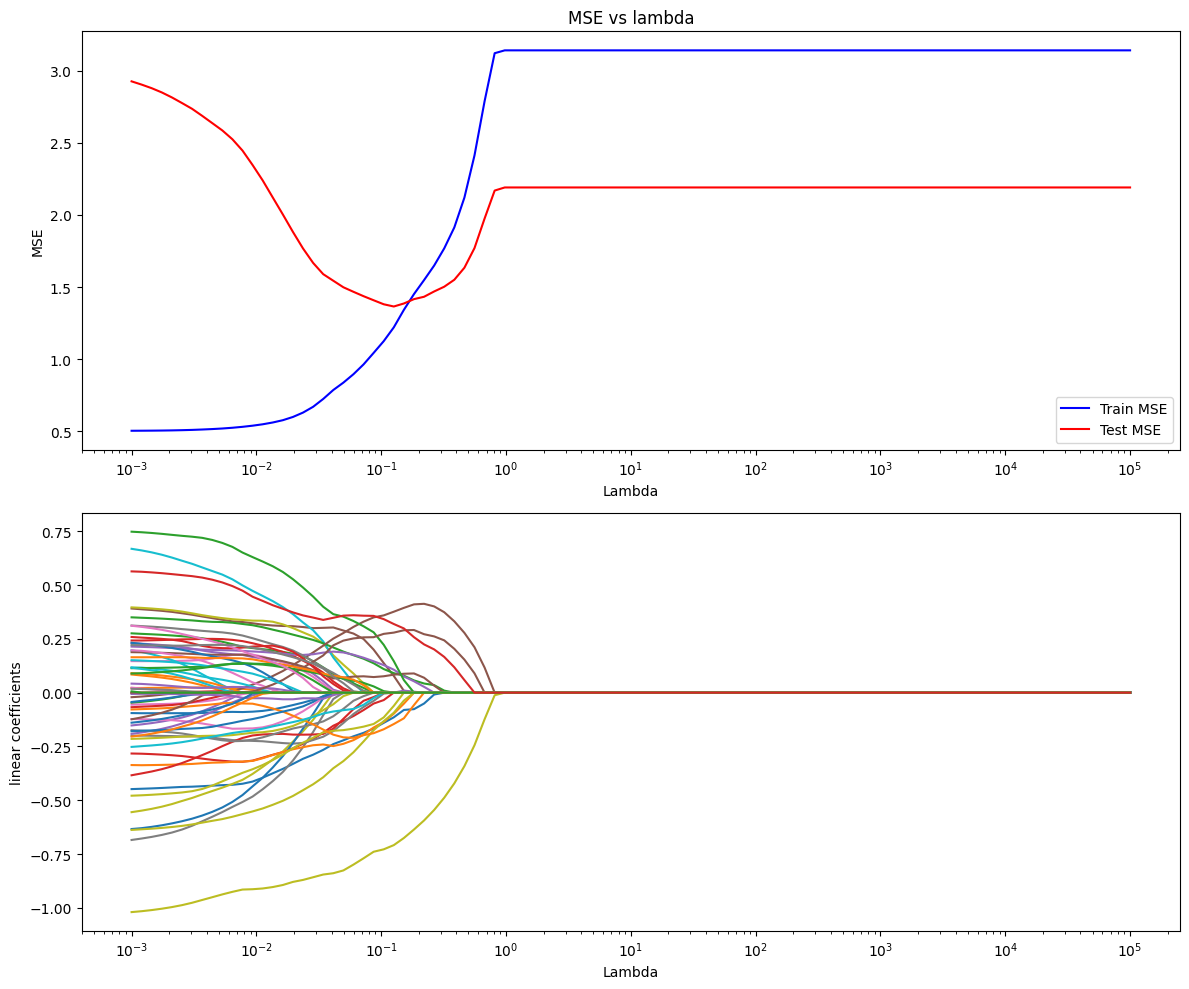

In [23]:
# Lasso regression for different lambdas + Best lambda selection

lambdas = np.logspace(-3, 5, 100)
#print(lambdas)
mse_tests_lasso = []
mse_trains_lasso = []
coefs_lasso = []
beta_lasso = []

# Lasso for different lambdas
for lam in lambdas:
    lasso = Lasso(alpha=lam).fit(X_train, Y_train)
    Ytrain_pred_lasso = lasso.predict(X_train)
    Ytest_pred_lasso = lasso.predict(X_test)
    mse_trains_lasso.append(mean_squared_error(Y_train, Ytrain_pred_lasso))
    mse_tests_lasso.append(mean_squared_error(Y_test, Ytest_pred_lasso))
    coefs_lasso.append(lasso.coef_)
    beta_lasso.append(lasso.intercept_)

# Best lambda selection
min_test_lasso = min(mse_tests_lasso)
min_idx_lasso = mse_tests_lasso.index(min_test_lasso)
print(min_test_lasso)
print(min_idx_lasso)
print(f'best lambda is: {lambdas[min_idx_lasso]}')

# Plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(lambdas, mse_trains_lasso, label='Train MSE', color='blue')
plt.plot(lambdas, mse_tests_lasso, label='Test MSE', color='red')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE vs lambda')
plt.legend()

plt.subplot(2, 1, 2)
coef_array_lasso = np.array(coefs_lasso)
for i in range(coef_array_lasso.shape[1]):
        plt.plot(lambdas, coef_array_lasso[:, i])
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('linear coefficients')
plt.tight_layout()
plt.show()


**Observations**

In the first plot (MSE vs Lambda), we can see that as lambda increases, the training error goes up while the test error first goes down, then rises again. This means that the model becomes less overfitted at first, but when lambda gets too large, it becomes too simple and starts underfitting the data, just like what happens with Ridge regression.

In the second plot (Coefficients vs Lambda), we see the main effect of Lasso: **sparsity**. As lambda grows, more and more coefficients shrink to zero. This means the model automatically removes less important features, making it simpler and more robust. Unlike Ridge, the changes in coefficients aren’t smooth because Lasso uses an L1 penalty instead of L2, which makes the optimization non-differentiable and causes these abrupt “jumps” in the curves.


Best lambda for Lasso: 0.1261856883066021


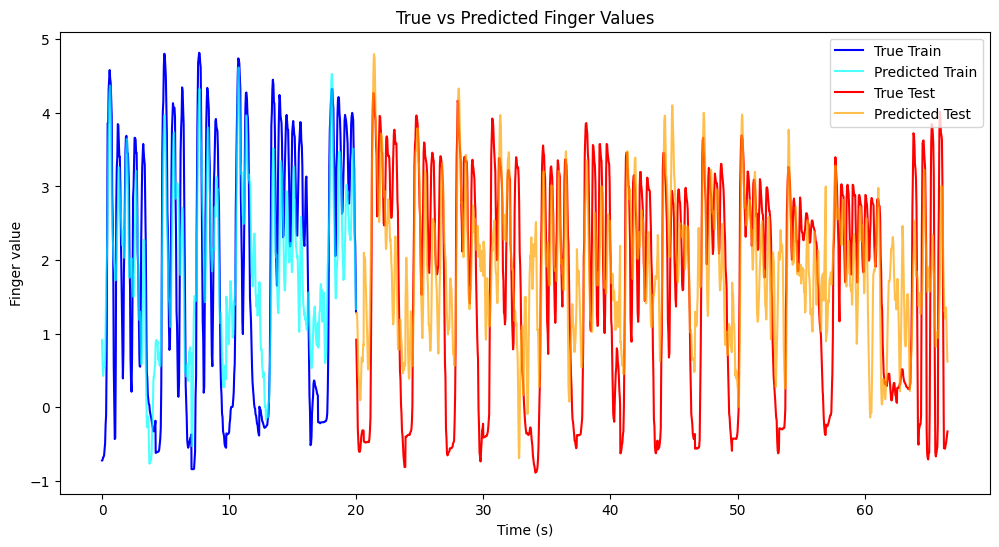

In [24]:
# Predictions with best lambda

best_lambda_lasso = lambdas[min_idx_lasso]
print(f'Best lambda for Lasso: {best_lambda_lasso}')


best_lasso = Lasso(alpha = best_lambda_lasso).fit(X_train, Y_train)
ytrain_pred_lasso = best_lasso.predict(X_train)
ytest_pred_lasso = best_lasso.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(t[:n], Y_train, label='True Train', color='blue')
plt.plot(t[:n], ytrain_pred_lasso, label='Predicted Train', color='cyan', alpha=0.7)
plt.plot(t[n:], Y_test, label='True Test', color='red')
plt.plot(t[n:], ytest_pred_lasso, label='Predicted Test', color='orange', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Finger value')
plt.title('True vs Predicted Finger Values')
plt.legend()
plt.show()


**Observations**

On the training part, the predicted curve almost perfectly overlaps with the true one, showing that the model fits the training data very well.

On the test part, the prediction still follows the general pattern of the signal but with noticeable differences in amplitude and timing.

This means the model captures the global behavior of the data but still struggles to generalize perfectly to unseen samples, a slight overfitting remains.

In [25]:
# best perf
mse_train_lasso_best = mean_squared_error(Y_train, ytrain_pred_lasso)
mse_test_lasso_best = mean_squared_error(Y_test, ytest_pred_lasso)
r2_train_lasso_best = r2_score(Y_train, ytrain_pred_lasso)
r2_test_lasso_best = r2_score(Y_test, ytest_pred_lasso)

print(f'lasso Training MSE: {mse_train_lasso_best:.4f}, R²: {r2_train_lasso_best:.4f}')
print(f'lasso Testing MSE: {mse_test_lasso_best:.4f}, R²: {r2_test_lasso_best:.4f}')

lasso Training MSE: 1.2216, R²: 0.6110
lasso Testing MSE: 1.3660, R²: 0.3595


(64,)
(64,)


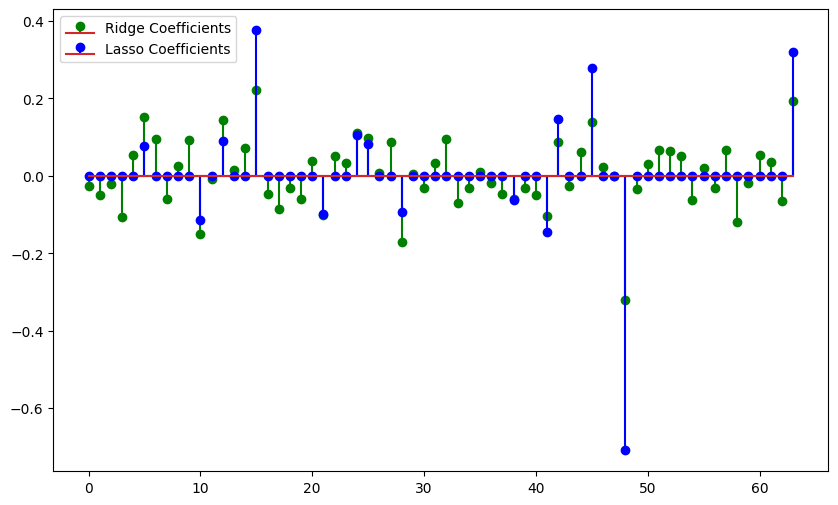

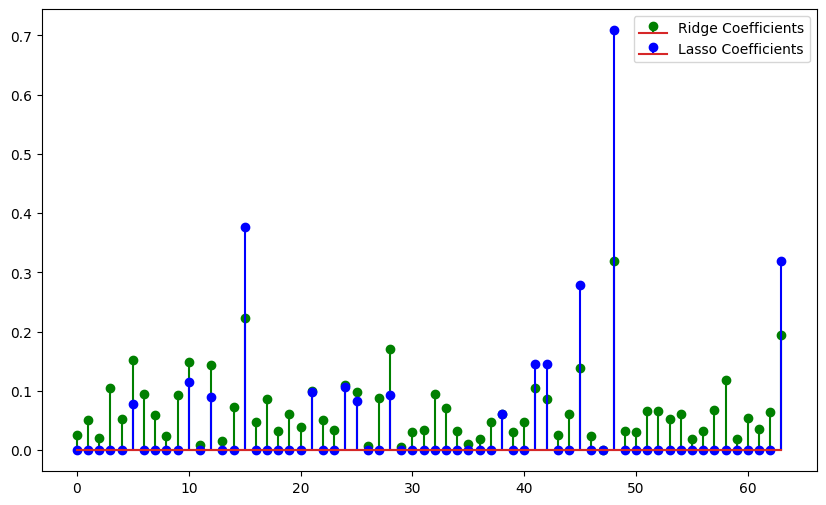

In [26]:
w_lasso = best_lasso.coef_
b_lasso = best_lasso.intercept_
w_ridge = best_rg.coef_
b_ridge = best_rg.intercept_

print(w_lasso.shape)
print(w_ridge.shape)

plt.figure(figsize=(10, 6))
plt.stem(w_ridge, linefmt='g-', markerfmt='go', label='Ridge Coefficients')
plt.stem(w_lasso.squeeze(), linefmt='b-', markerfmt='bo', label='Lasso Coefficients')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(np.abs(w_ridge), linefmt='g-', markerfmt='go', label='Ridge Coefficients')
plt.stem(np.abs(w_lasso.squeeze()), linefmt='b-', markerfmt='bo', label='Lasso Coefficients')
plt.legend()
plt.show()

We can see that:

- Ridge coefficients are all small but non-zero, meaning Ridge smooths the parameter values by shrinking them without eliminating any feature.

- Lasso coefficients are more extreme (some are large), while many are exactly zero. This shows the sparsity effect of Lasso, which performs implicit feature selection by removing less important variables.

- Thus, the two most important variables are the ones with the highest absolute value : 15 and
48 (i.e. electrodes 15 and 48).

In [27]:
print("Number of features with non-zero weights (Lasso): ", np.count_nonzero(best_lasso.coef_))

Number of features with non-zero weights (Lasso):  14


In total, only 14 of the original 64 features were retained.

This decrease can be interpreted in several ways. Most notably, having 64 electrodes on a single head is quite dense, so it’s likely that several electrodes capture overlapping brain activity.

In this case, reducing the number of electrodes is logical, as it helps remove redundant information, prevents overfitting, and improves the model’s ability to generalize.

## Non linear regression

In [28]:
# utils for hyperparameter tuning

def tuning_param(model, hyperparameters, x_train, y_train, x_test, y_test):
    best_params = {}
    current_params = {}
    best_mse = float('inf')

    for param, values in hyperparameters.items():
        for val in values:
            current_params.update(best_params)
            current_params[param] = val

            model.set_params(**current_params)
            model.fit(x_train, y_train)

            y_pred = model.predict(x_test)
            mse = mean_squared_error(y_test, y_pred)

            if mse < best_mse:
                best_params[param] = val
                best_mse = mse

    return best_params, best_mse

def prediction_plots(y_train, y_test, y_pred_train, y_pred_test, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    axes[0].plot(y_train, color='blue')
    axes[0].plot(y_pred_train, color='red')
    axes[0].set_ylabel("Flexion")
    axes[0].set_title(f"Training Set - {model_name}")
    axes[0].legend(["Real Flexion", "Predicted Flexion (Train)"], loc='lower right')

    axes[1].plot(y_test, color='blue')
    axes[1].plot(y_pred_test, color='red')
    axes[1].set_ylabel("Flexion")
    axes[1].set_title(f"Test Set - {model_name}")
    axes[1].legend(["Real Flexion", "Predicted Flexion (Test)"], loc='lower right')

    plt.tight_layout()
    plt.show()

### Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train.ravel())
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

rf_mse_train = mean_squared_error(Y_train, y_pred_train_rf)
rf_mse_test = mean_squared_error(Y_test, y_pred_test_rf)
rf_r2_train = r2_score(Y_train, y_pred_train_rf)
rf_r2_test = r2_score(Y_test, y_pred_test_rf)

print(f'Random Forest Training MSE: {rf_mse_train:.4f}, R²: {rf_r2_train:.4f}')
print(f'Random Forest Testing MSE: {rf_mse_test:.4f}, R²: {rf_r2_test:.4f}')

Random Forest Training MSE: 0.0243, R²: 0.9923
Random Forest Testing MSE: 1.6550, R²: 0.2239


**Observations**

Compared to Linear Regression, it is much better.

Compared to Ridge and Lasso Regression (tuned), it is slightly worse

**Parameters:**
- **n_estimators**: Number of trees in the forest.  
- **criterion**: Function used to measure the quality of a split.  
- **max_depth**: Maximum depth of each tree.  
- **min_samples_split**: Minimum number of samples required to split an internal node.  
- **min_samples_leaf**: Minimum number of samples required to form a leaf node.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_leaf': 1}
Random Forest (Best) Training MSE: 0.0560, R²: 0.9822
Random Forest (Best) Testing MSE: 1.6924, R²: 0.2064


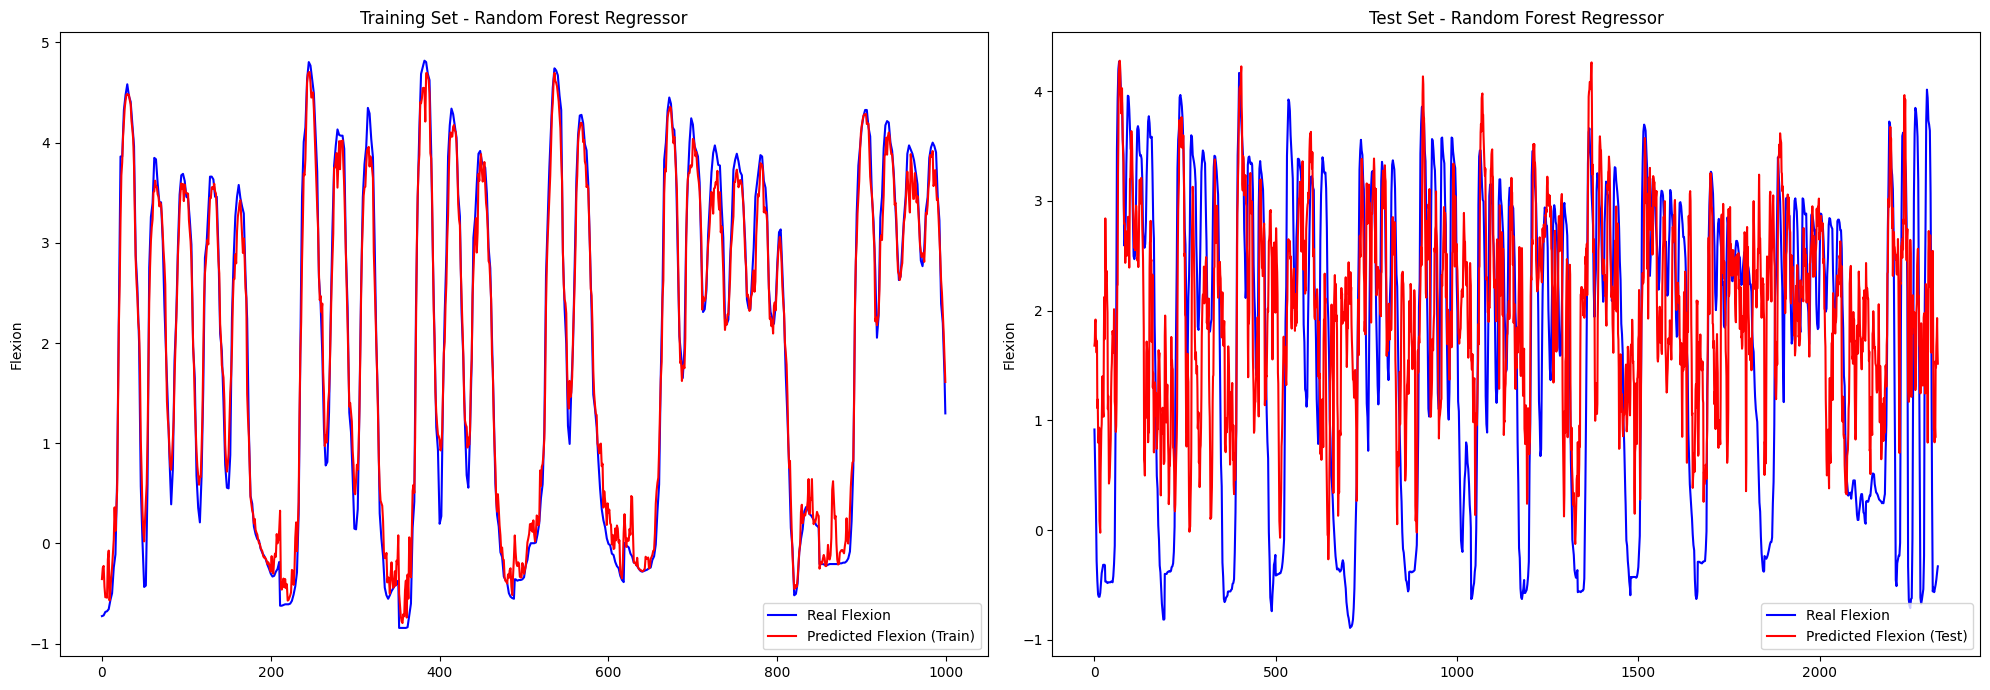

In [30]:
# parameter tuning
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_params_rf, best_mse_rf = tuning_param(rf, hyperparameters, X_train, Y_train, X_test, Y_test)
print("Best Parameters for Random Forest:", best_params_rf)

rf.set_params(**best_params_rf)
rf.fit(X_train, Y_train.ravel())
y_pred_train_rf_best = rf.predict(X_train)
y_pred_test_rf_best = rf.predict(X_test)

rf_mse_train_best = mean_squared_error(Y_train, y_pred_train_rf_best)
rf_mse_test_best = mean_squared_error(Y_test, y_pred_test_rf_best)
rf_r2_train_best = r2_score(Y_train, y_pred_train_rf_best)
rf_r2_test_best = r2_score(Y_test, y_pred_test_rf_best)

print(f'Random Forest (Best) Training MSE: {rf_mse_train_best:.4f}, R²: {rf_r2_train_best:.4f}')
print(f'Random Forest (Best) Testing MSE: {rf_mse_test_best:.4f}, R²: {rf_r2_test_best:.4f}')

prediction_plots(Y_train, Y_test, y_pred_train_rf_best, y_pred_test_rf_best, "Random Forest Regressor")

The Random Forest model performs reasonably well on the test set, but it still shows signs of overfitting.
After fine-tuning, the MSE didn’t improve much.

**In conclusion**, Random Forest is not a good choice for this problem with the current settings. It performs worse than the tuned Ridge and Lasso models and is also more complex and slower to run.


### Support vector Regressor

In [31]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, Y_train.ravel())
y_pred_train_svr = svr.predict(X_train)
y_pred_test_svr = svr.predict(X_test)

svr_mse_train = mean_squared_error(Y_train, y_pred_train_svr)
svr_mse_test = mean_squared_error(Y_test, y_pred_test_svr)
svr_r2_train = r2_score(Y_train, y_pred_train_svr)
svr_r2_test = r2_score(Y_test, y_pred_test_svr)

print(f'SVR Training MSE: {svr_mse_train:.4f}, R²: {svr_r2_train:.4f}')
print(f'SVR Testing MSE: {svr_mse_test:.4f}, R²: {svr_r2_test:.4f}')

SVR Training MSE: 0.0241, R²: 0.9923
SVR Testing MSE: 1.5152, R²: 0.2895


- Compared to Linear Regression, it is much better.
- Compared to Ridge Regression, it performs slightly better.
- Compared to Lasso Regression, it performs slightly worse

**Parameters**
- **kernel**: Type of kernel function used by the algorithm.  
- **degree**: Degree of the polynomial kernel (used only when `kernel='poly'`).  
- **gamma**: Kernel coefficient for the `rbf`, `poly` kernels.  
- **C**: Regularization parameter. The smaller the value, the stronger the regularization. Must be positive.

Best Parameters for SVR: {'C': 1, 'gamma': 'auto'}
SVR (Best) Training MSE: 0.2956, R²: 0.9059
SVR (Best) Testing MSE: 2.5099, R²: -0.1770


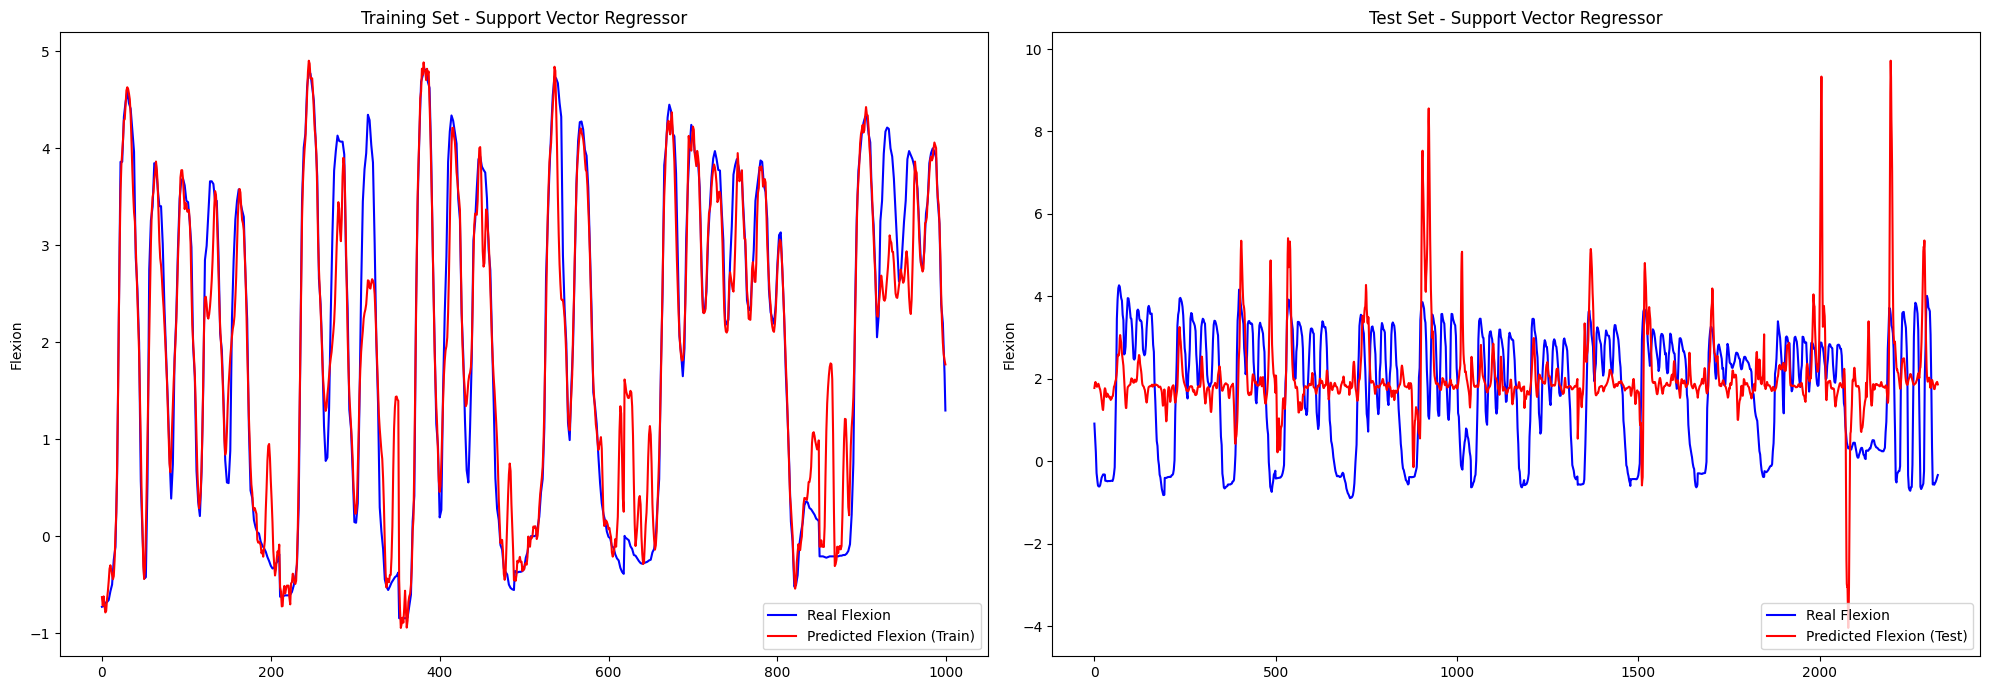

In [32]:
# parameters tuning
hyperparameters_svr = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

best_params_svr, best_mse_svr = tuning_param(svr, hyperparameters_svr, X_train, Y_train.ravel(), X_test, Y_test.ravel())
print("Best Parameters for SVR:", best_params_svr)

svr.set_params(**best_params_svr)
svr.fit(X_train, Y_train.ravel())
y_pred_train_svr_best = svr.predict(X_train)
y_pred_test_svr_best = svr.predict(X_test)

svr_mse_train_best = mean_squared_error(Y_train, y_pred_train_svr_best)
svr_mse_test_best = mean_squared_error(Y_test, y_pred_test_svr_best)
svr_r2_train_best = r2_score(Y_train, y_pred_train_svr_best)
svr_r2_test_best = r2_score(Y_test, y_pred_test_svr_best)

print(f'SVR (Best) Training MSE: {svr_mse_train_best:.4f}, R²: {svr_r2_train_best:.4f}')
print(f'SVR (Best) Testing MSE: {svr_mse_test_best:.4f}, R²: {svr_r2_test_best:.4f}')

prediction_plots(Y_train, Y_test, y_pred_train_svr_best, y_pred_test_svr_best, "Support Vector Regressor")

On the training set (left), the SVR model follows the true flexion curve very closely. However, on the test set, the predictions are much less accurate, the model fails to capture several peaks and shows large deviations, especially for higher flexion values.

**Conclusion:** Although SVR fits the training data almost perfectly, its poor performance on the test data shows that the model still struggles to generalize to new samples.

### MLP

In [33]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=1000)

mlp.fit(X_train, Y_train.ravel())
y_pred_train_mlp = mlp.predict(X_train)
y_pred_test_mlp = mlp.predict(X_test)

mlp_mse_train = mean_squared_error(Y_train, y_pred_train_mlp)
mlp_mse_test = mean_squared_error(Y_test, y_pred_test_mlp)
mlp_r2_train = r2_score(Y_train, y_pred_train_mlp)
mlp_r2_test = r2_score(Y_test, y_pred_test_mlp)

print(f'MLP Training MSE: {mlp_mse_train:.4f}, R²: {mlp_r2_train:.4f}')
print(f'MLP Testing MSE: {mlp_mse_test:.4f}, R²: {mlp_r2_test:.4f}')

MLP Training MSE: 0.0096, R²: 0.9969
MLP Testing MSE: 2.0229, R²: 0.0514


The model performs very poorly, about as bad as the Least Squares Regression.

By default, sklearn uses a hidden layer of size (100,), which is quite small for an MLP. Combined with the limited size of the dataset, this simple architecture doesn’t have enough capacity to learn complex patterns.

Therefore, the weak performance of the model is not surprising.

**Parameters**
- **hidden_layer_sizes**: Defines the number of neurons in each hidden layer.  
- **activation**: Activation function used in the hidden layers.  
- **solver**: Optimization algorithm used to adjust the weights.
- **learning_rate**: Strategy used to control the step size during training.

Best Parameters for MLP: {'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
MLP (Best) Training MSE: 0.0004, R²: 0.9999
MLP (Best) Testing MSE: 2.3032, R²: -0.0801


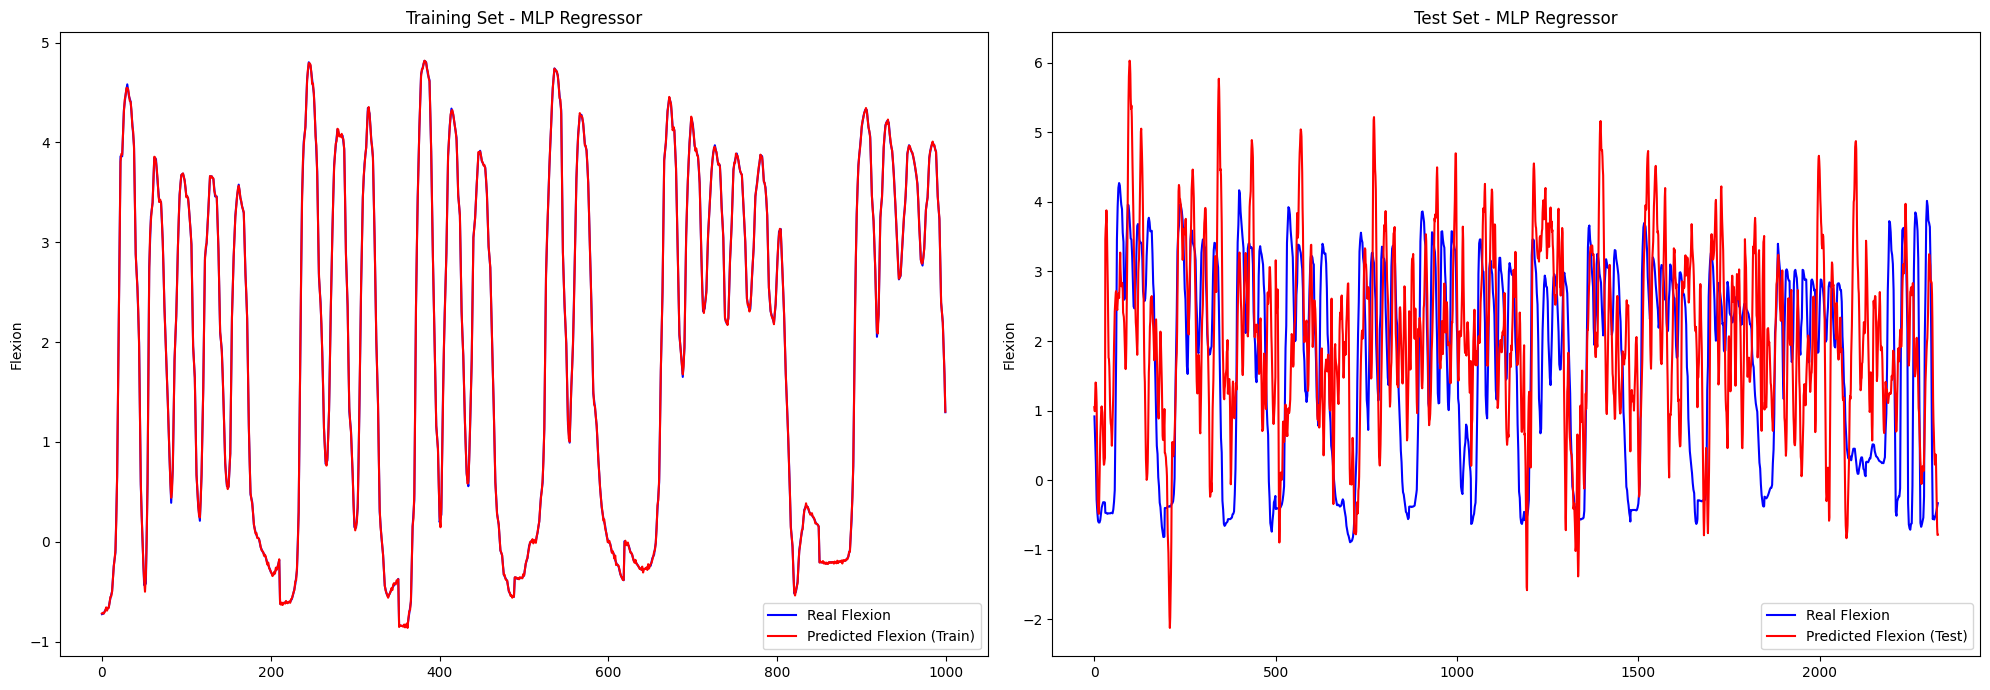

In [34]:
# parameter tuning
hyperparameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 20)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive']
}

best_params_mlp, best_mse_mlp = tuning_param(mlp, hyperparameters, X_train, Y_train.ravel(), X_test, Y_test.ravel())
print("Best Parameters for MLP:", best_params_mlp)

mlp.set_params(**best_params_mlp)
mlp.fit(X_train, Y_train.ravel())
y_pred_train_mlp_best = mlp.predict(X_train)
y_pred_test_mlp_best = mlp.predict(X_test)
mlp_mse_train_best = mean_squared_error(Y_train, y_pred_train_mlp_best)
mlp_mse_test_best = mean_squared_error(Y_test, y_pred_test_mlp_best)
mlp_r2_train_best = r2_score(Y_train, y_pred_train_mlp_best)
mlp_r2_test_best = r2_score(Y_test, y_pred_test_mlp_best)

print(f'MLP (Best) Training MSE: {mlp_mse_train_best:.4f}, R²: {mlp_r2_train_best:.4f}')
print(f'MLP (Best) Testing MSE: {mlp_mse_test_best:.4f}, R²: {mlp_r2_test_best:.4f}')

prediction_plots(Y_train, Y_test, y_pred_train_mlp_best, y_pred_test_mlp_best, "MLP Regressor")

On the training set, the MLP model fits the real flexion curve almost perfectly.

However, on the test set, the predictions are much less consistent. The model fails to follow the true pattern accurately.

**Conclusion:** The MLP model performs very well on the training set but poorly on the test set, confirming that it is not suitable for this problem in its current configuration.

## Final comparison of the performances

In [35]:
models = ['Ridge Regression', 'Lasso Regression', 'Random Forest', 'Support Vector Regressor', 'MLP Regressor']
mse_tests = [mse_test_ridge_best, mse_test_lasso_best, rf_mse_test_best, svr_mse_test_best, mlp_mse_test_best]
r2_tests = [r2_test_ridge_best, r2_test_lasso_best, rf_r2_test_best, svr_r2_test_best, mlp_r2_test_best]
performance_df = pd.DataFrame({
    'Model': models,
    'Test MSE': mse_tests,
    'Test R²': r2_tests
})

performance_df

Model  Test MSE   Test R²
0          Ridge Regression  1.623906  0.238488
1          Lasso Regression  1.365954  0.359451
2             Random Forest  1.692438  0.206350
3  Support Vector Regressor  2.509940 -0.177008
4             MLP Regressor  2.303208 -0.080063

**Conclusion**

- **Lasso** works best (lowest Test MSE, highest (R²)), followed by **Ridge**.
- Random Forest is behind, and **SVR/MLP** perform poorly (negative (R²)).

- **Most interpretable:**  
  Lasso and Ridge regression. Both are linear models, so their coefficients are easy to understand.  
  Lasso is even simpler because it keeps only the most important features.

- **Medical/practical model:**  
  Lasso performs the best on the test data (lowest MSE, highest R²).  
  It is also sparse and easy to explain, which is important for medical use.

- **Need for non-linearity:**  
  No. The non-linear models (Random Forest, SVR, MLP) perform worse than the linear ones.  
  This means the relationship in the data is mostly linear.

- **Validation on test data:**  
  Not a good practice. The test set should only be used once for the final evaluation.  
  Use cross-validation on the training data to tune and select the model.  
  For production, train the final model on all available data, save the pipeline,  
  and plan to monitor and retrain it regularly if the data changes.
